In [1]:
# constructs PPP for different media compositions
%run create_model.py
import numpy as np
import matplotlib.pyplot as plt
from cobra.flux_analysis.phenotype_phase_plane import production_envelope

'' is not a valid SBML 'SId'.


Max theorhetical biomass production  Glucose :  0.9398547241492499 /h
Max theorhetical ARTA production:  Glucose :  2.808134394341291 mmol/( g[dry_weight]*h )
Max theorhetical biomass production  Fructose :  0.9398547241492661 /h
Max theorhetical ARTA production:  Fructose :  2.8081343943412564 mmol/( g[dry_weight]*h )
Max theorhetical biomass production  Fumarate :  0.4699273620746359 /h
Max theorhetical ARTA production:  Fumarate :  1.4040671971706449 mmol/( g[dry_weight]*h )
Max theorhetical biomass production  Pyruvate :  0.3916061350621916 /h
Max theorhetical ARTA production:  Pyruvate :  1.170055997642206 mmol/( g[dry_weight]*h )
Max theorhetical biomass production  Lactose :  1.8797094482985115 /h
Max theorhetical ARTA production:  Lactose :  5.6162687886825795 mmol/( g[dry_weight]*h )
Max theorhetical biomass production  Maltose :  1.8797094482985286 /h
Max theorhetical ARTA production:  Maltose :  5.61626878868258 mmol/( g[dry_weight]*h )


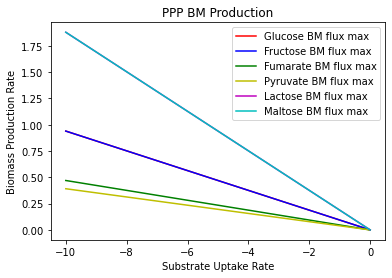

<function matplotlib.pyplot.show(close=None, block=None)>

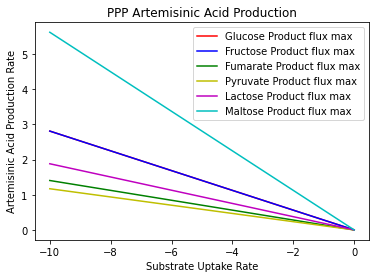

In [2]:
list_substrates = ['BOUNDARY_GLCe', 'BOUNDARY_FRUe', 'BOUNDARY_FUMe', 'BOUNDARY_PYRe', 'BOUNDARY_LACTe', 'BOUNDARY_MLTe']
list_names = ['Glucose', 'Fructose', 'Fumarate', 'Pyruvate', 'Lactose', 'Maltose']
list_envelopes_BM = ['EV_Glucose', 'EV_Fructose', 'EV_Fumarate', 'EV_Pyruvate', 'EV_Lactose', 'EV_Maltose']
list_envelopes_ARTEM = ['EV_Glucose', 'EV_Fructose', 'EV_Fumarate', 'EV_Pyruvate', 'EV_Lactose', 'EV_Maltose']

for substrate in list_substrates:    
    with model:
        # changes to media
        media = model.medium         
        media['BOUNDARY_GLCe'] = 0
        media[substrate] = 10
        model.medium = media
        # max theorhetical biomass production
        biomass_production = model.optimize()
        print('Max theorhetical biomass production ', list_names[list_substrates.index(substrate)], ': ', biomass_production.fluxes['DRAIN_Biomass'], '/h')
        # max theorhetical productivity
        model.objective = model.reactions.ARTA_ex
        ARTA_production = model.optimize().objective_value
        print('Max theorhetical ARTA production: ', list_names[list_substrates.index(substrate)], ': ', ARTA_production, 'mmol/( g[dry_weight]*h )')
        #put together envelopes and plot
        #envelope Biomass
        list_envelopes_BM[list_substrates.index(substrate)] = production_envelope(model, reactions=[model.reactions.get_by_id(substrate)], objective=model.reactions.DRAIN_Biomass)
        legend_y_BM = str(list_names[list_substrates.index(substrate)])+' flux_maximum'
        #envelope Artemisinic Acid Production
        list_envelopes_ARTEM[list_substrates.index(substrate)] = production_envelope(model, reactions=[model.reactions.get_by_id(substrate)], objective=model.reactions.ARTA_ex)
        legend_y_ARTEM = str(list_names[list_substrates.index(substrate)])+' flux_maximum'

#plt.subplot(1, 2, 1)
#Plot BM PPP
X1 = list_envelopes_BM[0].BOUNDARY_GLCe
y_glucose = list_envelopes_BM[0].flux_maximum
y_fructose = list_envelopes_BM[1].flux_maximum
y_fumarate = list_envelopes_BM[2].flux_maximum
y_pyruvate = list_envelopes_BM[3].flux_maximum
y_lactose = list_envelopes_BM[4].flux_maximum
y_maltose = list_envelopes_BM[5].flux_maximum

p1 = plt.plot(X1, y_glucose, color='r', label='Glucose BM flux max')
p1 = plt.plot(X1, y_fructose, color='b', label='Fructose BM flux max')
p1 = plt.plot(X1, y_fumarate, color='g', label='Fumarate BM flux max')
p1 = plt.plot(X1, y_pyruvate, color='y', label='Pyruvate BM flux max')
p1 = plt.plot(X1, y_lactose, color='m', label='Lactose BM flux max')
p1 = plt.plot(X1, y_maltose, color='c', label='Maltose BM flux max')
p1 = plt.legend(loc="upper right")
p1 = plt.xlabel("Substrate Uptake Rate")
p1 = plt.ylabel("Biomass Production Rate")
p1 = plt.title("PPP BM Production")

plt.show()

#plt.subplot(1, 2, 2)
#Plot ARTEM PPP
X2 = list_envelopes_ARTEM[0].BOUNDARY_GLCe
y_glucose = list_envelopes_ARTEM[0].flux_maximum
y_fructose = list_envelopes_ARTEM[1].flux_maximum
y_fumarate = list_envelopes_ARTEM[2].flux_maximum
y_pyruvate = list_envelopes_ARTEM[3].flux_maximum
y_lactosee = list_envelopes_ARTEM[4].flux_maximum
y_maltose = list_envelopes_ARTEM[5].flux_maximum

p2 = plt.plot(X2, y_glucose, color='r', label='Glucose Product flux max')
p2 = plt.plot(X2, y_fructose, color='b', label='Fructose Product flux max')
p2 = plt.plot(X2, y_fumarate, color='g', label='Fumarate Product flux max')
p2 = plt.plot(X2, y_pyruvate, color='y', label='Pyruvate Product flux max')
p2 = plt.plot(X2, y_lactose, color='m', label='Lactose Product flux max')
p2 = plt.plot(X2, y_maltose, color='c', label='Maltose Product flux max')
p2 = plt.legend(loc="upper right")
p2 = plt.xlabel("Substrate Uptake Rate")
p2 = plt.ylabel("Artemisinic Acid Production Rate")
p2 = plt.title("PPP Artemisinic Acid Production")
plt.show


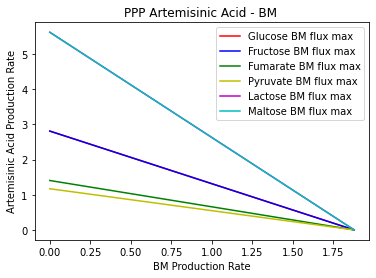

In [3]:
#Now PPP for Product production vs Biomass

#find maximum BM flux without any product flux
model.optimize().objective_value
BM_max = model.optimize().objective_value
#divide BM_max into 10 parts and iterate over it, setting the lower boundary
#of BM flux to cumulative sum of parts.
#array_biomass = np.arange(0, BM_max, BM_max/10)
array_biomass = np.linspace(0, BM_max, num=10)
array_secretion = []
BM_reaction = Reaction('DRAIN_Biomass')

list_substrates = ['BOUNDARY_GLCe', 'BOUNDARY_FRUe', 'BOUNDARY_FUMe', 'BOUNDARY_PYRe', 'BOUNDARY_LACTe', 'BOUNDARY_MLTe']
list_arrays_BM = ['BM_Glucose', 'BM_Fructose', 'BM_Fumarate', 'BM_Pyruvate', 'BM_Lactose', 'BM_Maltose']

for substrate in list_substrates:    
    with model:
        # changes to media
        media = model.medium         
        media['BOUNDARY_GLCe'] = 0
        media[substrate] = 10
        model.medium = media
        
        BM_max = model.optimize().objective_value
        array_biomass = np.linspace(0, BM_max, num=10)
        array_secretion = []
        BM_reaction = Reaction('DRAIN_Biomass')
    
        for i in array_biomass:
            with model:
                model.reactions.DRAIN_Biomass.bounds = i, 1000
                model.objective = model.reactions.ARTA_ex
                solution = model.optimize()    
                array_secretion.append(solution.fluxes.ARTA_ex)

        list_arrays_BM[list_substrates.index(substrate)] = array_secretion

X = array_biomass
y_glucose = list_arrays_BM[0]
y_fructose = list_arrays_BM[1]
y_fumarate = list_arrays_BM[2]
y_pyruvate = list_arrays_BM[3]
y_lactose = list_arrays_BM[4]
y_maltose = list_arrays_BM[5]

p1 = plt.plot(X, y_glucose, color='r', label='Glucose BM flux max')
p1 = plt.plot(X, y_fructose, color='b', label='Fructose BM flux max')
p1 = plt.plot(X, y_fumarate, color='g', label='Fumarate BM flux max')
p1 = plt.plot(X, y_pyruvate, color='y', label='Pyruvate BM flux max')
p1 = plt.plot(X, y_lactose, color='m', label='Lactose BM flux max')
p1 = plt.plot(X, y_maltose, color='c', label='Maltose BM flux max')
p1 = plt.legend(loc="upper right")
p1 = plt.xlabel("BM Production Rate")
p1 = plt.ylabel("Artemisinic Acid Production Rate")
p1 = plt.title("PPP Artemisinic Acid - BM ")

plt.show()

 